In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data= pd.read_csv('/content/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.isnull().sum()


mpg             0
cylinders       0
displacement    1
horsepower      1
weight          0
acceleration    2
model year      0
origin          0
car name        0
dtype: int64

In [6]:
var_mpg_df=data
var_mpg_df.dropna(inplace=True)
var_mpg_df = var_mpg_df[var_mpg_df.horsepower != '?']  # Remove '?' entries in horsepower
var_mpg_df['horsepower'] = var_mpg_df['horsepower'].astype(float)


<ipython-input-6-7dcd6247879f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_mpg_df['horsepower'] = var_mpg_df['horsepower'].astype(float)


<ipython-input-7-b7269bc7b77a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var_mpg_df['mpg'])


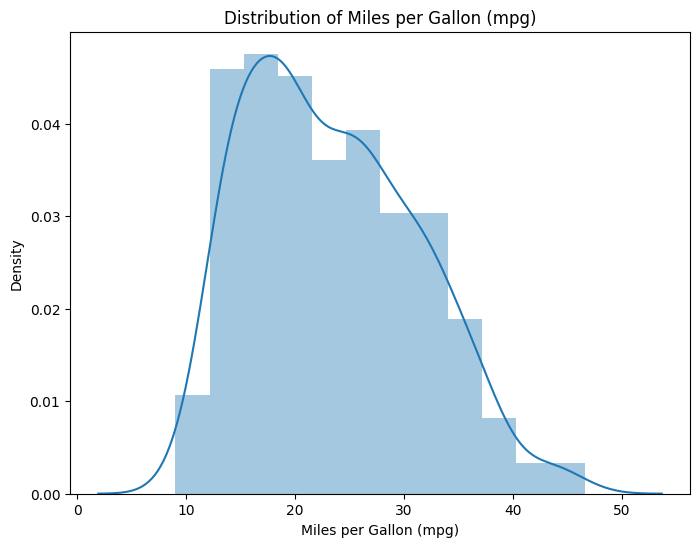

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(var_mpg_df['mpg'])
plt.title('Distribution of Miles per Gallon (mpg)')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Density')
plt.show()

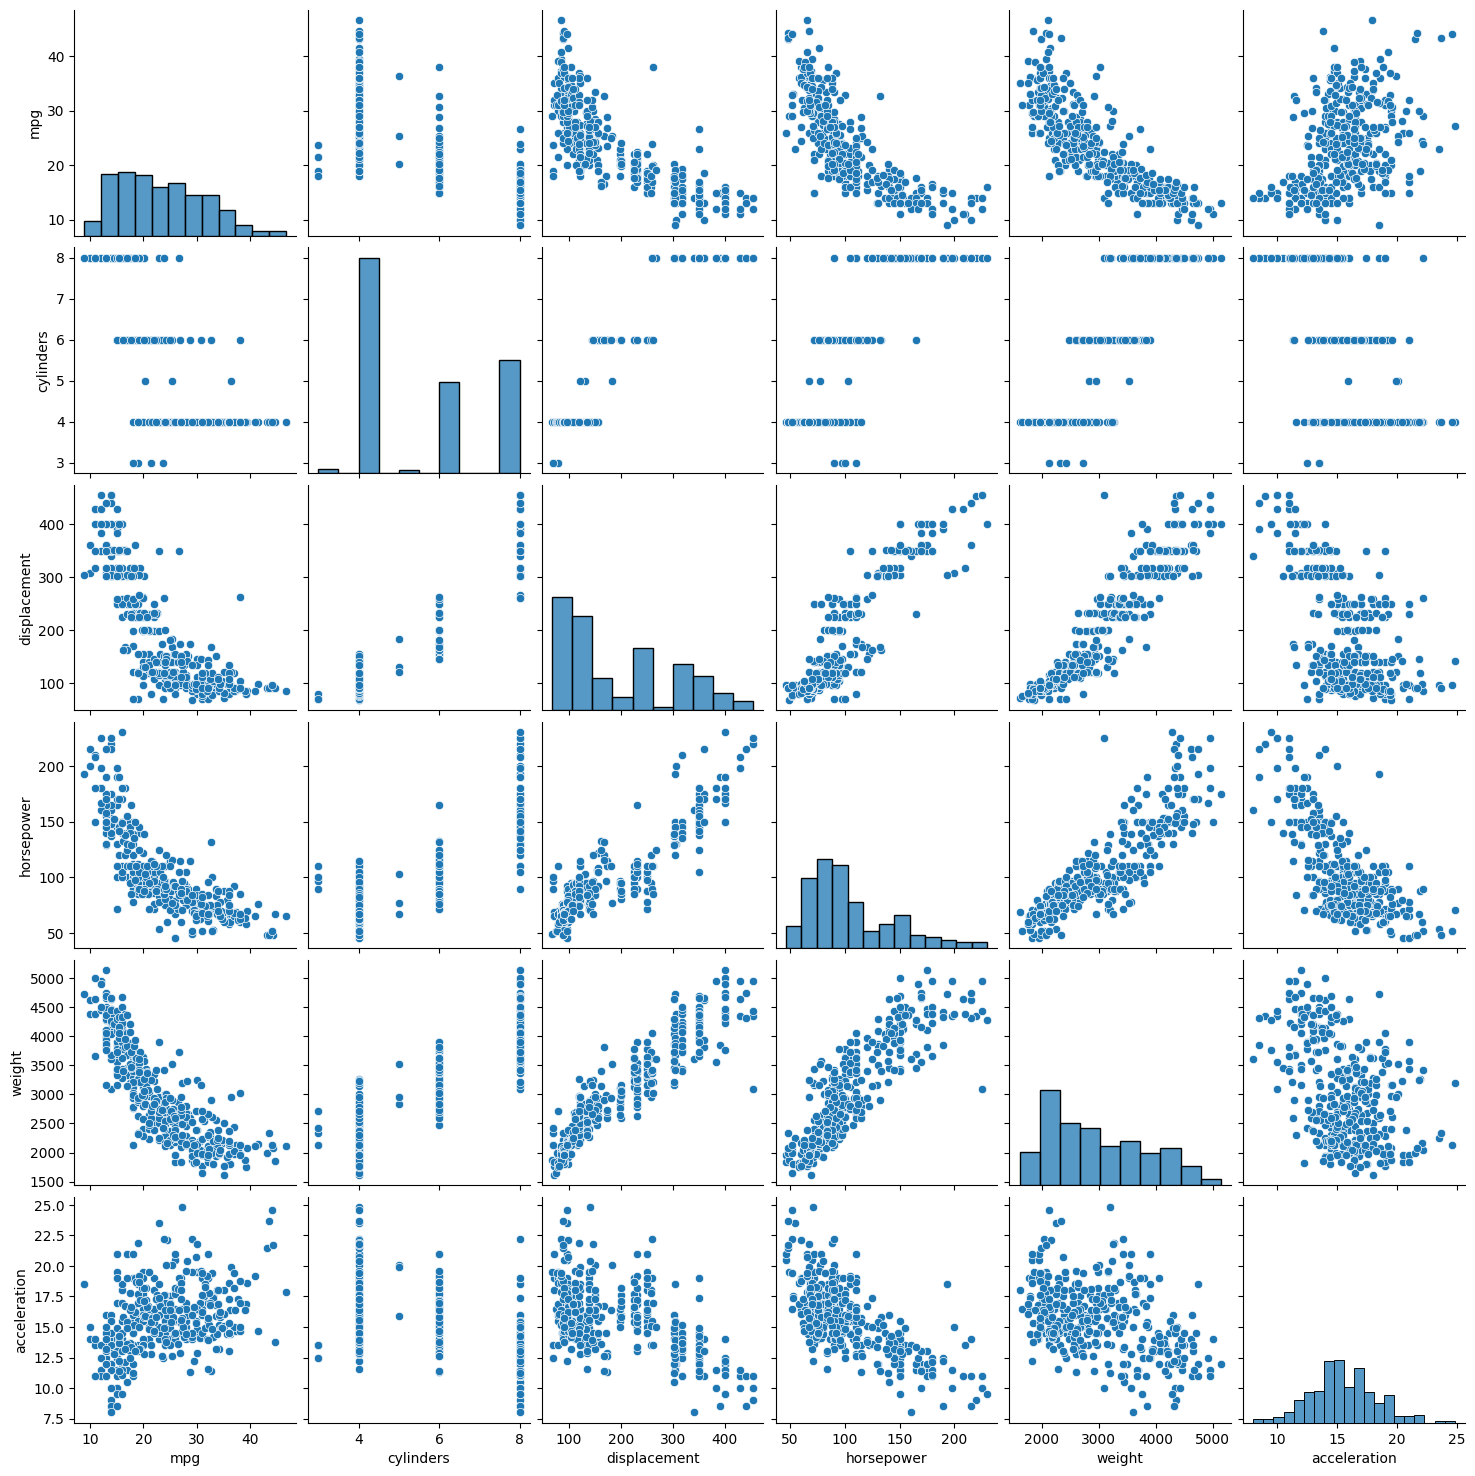

In [8]:
sns.pairplot(var_mpg_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.show()


In [9]:
numerical_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
z_scores = np.abs(stats.zscore(var_mpg_df[numerical_cols]))
var_mpg_df_clean = var_mpg_df[(z_scores < 3).all(axis=1)]

In [11]:
var_X = var_mpg_df_clean[numerical_cols]
var_y = var_mpg_df_clean['mpg']


In [12]:
var_X_train, var_X_test, var_y_train, var_y_test = train_test_split(var_X, var_y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
var_X_train_scaled = scaler.fit_transform(var_X_train)
var_X_test_scaled = scaler.transform(var_X_test)

In [14]:
model = LinearRegression()
model.fit(var_X_train_scaled, var_y_train)

LinearRegression()

In [15]:
var_y_pred = model.predict(var_X_test_scaled)
rmse = mean_squared_error(var_y_test, var_y_pred, squared=False)
r2 = r2_score(var_y_test, var_y_pred)

In [16]:
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Root Mean Square Error (RMSE): 4.861841894709964
R-squared (R²): 0.6067949177328384
